In [1]:
import json

In [2]:
#Load car-damage-val.json
with open('dataset/val/car-damage-val.json') as f:
    car_damage_val_data = json.load(f)
    
#Load car-damage-val_attributes.json
with open('dataset/val/car-damage-val_attributes.json') as f:
    car_damage_val_attributes_data = json.load(f)
    
#Load val_multiclass.json
with open('dataset/val/val_multiclass.json') as f:
    val_multiclass_data = json.load(f)
    
#Load via_region_data.json
with open('dataset/val/via_region_data.json') as f:
    via_region_data = json.load(f)
    

In [3]:
car_damage_val_data.keys()

dict_keys(['_via_settings', '_via_img_metadata', '_via_attributes'])

In [4]:
car_damage_val_data['_via_settings']

{'ui': {'annotation_editor_height': 25,
  'annotation_editor_fontsize': 0.8,
  'leftsidebar_width': 18,
  'image_grid': {'img_height': 80,
   'rshape_fill': 'none',
   'rshape_fill_opacity': 0.3,
   'rshape_stroke': 'yellow',
   'rshape_stroke_width': 2,
   'show_region_shape': True,
   'show_image_policy': 'all'},
  'image': {'region_label': 'name', 'region_label_font': '10px Sans'}},
 'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''},
 'project': {'name': 'car-damage-val'}}

In [5]:
car_damage_val_data['_via_img_metadata']['1.jpg79148']

{'filename': '1.jpg',
 'size': 79148,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [454,
     388,
     364,
     375,
     422,
     495,
     516,
     554,
     539,
     550,
     539,
     521,
     495],
    'all_points_y': [143,
     296,
     424,
     505,
     597,
     633,
     577,
     489,
     349,
     259,
     210,
     166,
     150]},
   'region_attributes': {'name': 'damage'}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [528,
     505,
     392,
     391,
     409,
     432,
     477,
     528,
     560,
     563,
     548,
     537],
    'all_points_y': [622,
     675,
     675,
     712,
     778,
     824,
     822,
     785,
     729,
     688,
     662,
     647]},
   'region_attributes': {'name': 'damage'}}],
 'file_attributes': {}}

In [6]:
car_damage_val_data['_via_attributes']

{'region': {'name': {'type': 'text',
   'description': 'Name of the object',
   'default_value': 'damage'},
  'type': {'type': 'dropdown',
   'description': 'Category of object',
   'options': {'scratch': 'Car Scratch',
    'dent': 'Car Dent',
    'unknown': 'Unknown (damage)'},
   'default_options': {}}},
 'file': {}}

In [7]:
car_damage_val_attributes_data.keys()

dict_keys(['region', 'file'])

In [8]:
car_damage_val_attributes_data['region']

{'name': {'type': 'text',
  'description': 'Name of the object',
  'default_value': 'damage'},
 'type': {'type': 'dropdown',
  'description': 'Category of object',
  'options': {'scratch': 'Car Scratch',
   'dent': 'Car Dent',
   'unknown': 'Unknown (damage)'},
  'default_options': {}}}

In [9]:
val_multiclass_data['1.jpg79148']

{'filename': '1.jpg',
 'size': 79148,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [185, 187, 288, 412, 506],
    'all_points_y': [4, 143, 143, 88, 6]},
   'region_attributes': {'name': 'headlamp'}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [4,
     192,
     327,
     427,
     519,
     564,
     580,
     596,
     667,
     696,
     671,
     678,
     652,
     642,
     597,
     505,
     454,
     279,
     165,
     91,
     7],
    'all_points_y': [132,
     149,
     139,
     78,
     0,
     14,
     97,
     139,
     139,
     143,
     401,
     460,
     686,
     775,
     819,
     823,
     823,
     820,
     816,
     758,
     749]},
   'region_attributes': {'name': 'rear_bumper'}}],
 'file_attributes': {}}

In [10]:
via_region_data['1.jpg79148']

{'filename': '1.jpg',
 'size': 79148,
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [454,
     388,
     364,
     375,
     422,
     495,
     516,
     554,
     539,
     550,
     539,
     521,
     495],
    'all_points_y': [143,
     296,
     424,
     505,
     597,
     633,
     577,
     489,
     349,
     259,
     210,
     166,
     150]},
   'region_attributes': {'name': 'damage'}},
  {'shape_attributes': {'name': 'polygon',
    'all_points_x': [528,
     505,
     392,
     391,
     409,
     432,
     477,
     528,
     560,
     563,
     548,
     537],
    'all_points_y': [622,
     675,
     675,
     712,
     778,
     824,
     822,
     785,
     729,
     688,
     662,
     647]},
   'region_attributes': {'name': 'damage'}}],
 'file_attributes': {}}

In [14]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import skimage.io as io
import numpy as np

In [29]:
def return_color():
    return (np.random.random((1, 3))*0.6+0.4).tolist()[0]

In [30]:
def plot_segments(img_name, img_ann):
    """
    This function helps to visualize the dataset

    """
    plt.rcParams["figure.figsize"] = [16,9]
    I = io.imread('dataset/val/{}'.format(img_name))
    ax = plt.gca()
    # Display the image
    ax.imshow(I)

    color = []
    polygons = []
    regions = img_ann['regions']
    
    for region in regions:
        poly = list(zip(region['shape_attributes']['all_points_x'],region['shape_attributes']['all_points_y']))
        poly_list = [list(el) for el in poly] 
        np_poly = np.array(poly).reshape((len(poly_list),2))
        polygons.append(Polygon(poly))
        color.append(return_color())   
        
    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)


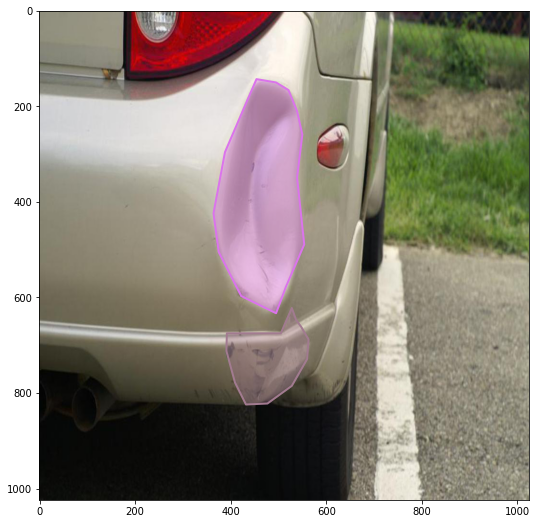

In [31]:
# plot_segments("1.jpg",val_multiclass_data['1.jpg79148'])
plot_segments("1.jpg",via_region_data['1.jpg79148'])
plt.show()